**Standard Deviation Method**

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution.

Identified outliers: 29
Non-outlier observations: 9971


**Interquartile Range Method**

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle.

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


**Unsupervised Outlier Detection using Local Outlier Factor (LOF)**

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [ ]:
# we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [ ]:
The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

In [ ]:
We can achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

In [ ]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


In [ ]:
Firstly, we can see that the number of examples in the training dataset has been reduced from 339 to 305, meaning 34 rows containing outliers were identified and deleted.
We can also see a reduction in MAE from about 3.417 by a model fit on the entire training dataset, to about 3.356 on a model fit on the dataset with outliers removed.

**Automatic Outlier Detection**

In [ ]:
#below loads the dataset and splits it into the input and output columns, splits it into train and test datasets, then summarizes the shapes of the data arrays.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


Baseline Model Performance

In [ ]:
It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.
In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).

In [ ]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [ ]:
#we can see that the model achieved a MAE of about 3.417. This provides a baseline in performance to which we can compare different outlier identification and removal procedures.

In [ ]:
#we can try removing outliers from the training dataset.

**1.Isolation Forest**

In [ ]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.288


In [ ]:
we can see that that model identified and removed 34 outliers and achieved a MAE of about 3.189, an improvement over the baseline that achieved a score of about 3.417.

Minimum Covariance Determinant

In [ ]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(335, 13) (335,)
MAE: 3.388


In [ ]:
we can see that the elliptical envelope method identified and removed only 4 outliers, resulting in a drop in MAE from 3.417 with the baseline to 3.388.

3.Local Outlier Factor

In [ ]:
# evaluate model performance with outliers removed using local outlier factor
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


In [ ]:
 we can see that the local outlier factor method identified and removed 34 outliers, the same number as isolation forest, resulting in a drop in MAE from 3.417 with the baseline to 3.356. Better, but not as good as isolation forest, suggesting a different set of outliers were identified and removed.

4.One-Class SVM

In [ ]:
# evaluate model performance with outliers removed using one class SVM
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
#The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1. In this case, we will set it to 0.01, found with a little trial and error.
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(336, 13) (336,)
MAE: 3.431


**IQR Method**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [ ]:
df=pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#Check shape of data
df.shape

(32, 12)

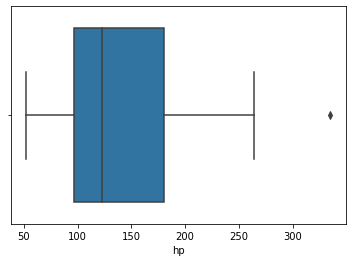

In [ ]:
#Check Outliers
import seaborn as sns
sns.boxplot(data=df,x=df['hp'])

In [ ]:
# Implementation
Q1=df['hp'].quantile(0.25)
Q3=df['hp'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

96.5
180.0
83.5
-28.75 305.25


In [ ]:
#Outlier Treatment
#Apply conditions to remove outliers:
df = df[df['hp']< Upper_Whisker]
#Outliers will be any points below Lower_Whisker or above Upper_Whisker

In [ ]:
#Check shape of data
df.shape

(31, 12)

**weight-height**

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [35]:
Data=pd.read_csv("weight-height.csv")
Data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [36]:
Q1=Data.Height.quantile(0.25)
Q3=Data.Height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [37]:
IQR=Q3-Q1
IQR

5.668641245615746

In [38]:
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit,Upper_limit

(55.00265861279534, 77.67722359525831)

In [39]:
#Height outliers
Data_outlier=Data[(Data.Height<lower_limit)|(Data.Height>Upper_limit)]
Data_outlier

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [40]:
Data_no_outlier=Data[(Data.Height>lower_limit)&(Data.Height<Upper_limit)]
Data_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [41]:
Q1=Data.Weight.quantile(0.25)
Q3=Data.Weight.quantile(0.75)
Q1,Q3

(135.8180513055015, 187.16952486868348)

In [42]:
IQR=Q3-Q1
IQR

51.35147356318197

In [43]:
Weight_lower_limit=Q1-1.5*IQR
Weight_Upper_limit=Q3+1.5*IQR
Weight_lower_limit,Weight_Upper_limit

(58.79084096072856, 264.19673521345646)

In [44]:
# Weight outliers
Data_outlier=Data[(Data.Weight<Weight_lower_limit)|(Data.Weight>Weight_Upper_limit)]
Data_outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [45]:
Data_no_outlier=Data[(Data.Weight>Weight_lower_limit)&(Data.Weight<Weight_Upper_limit)]
Data_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**Z Score Method**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car-mpg.csv to car-mpg.csv


In [ ]:
df=pd.read_csv('car-mpg.csv')
df.head()

,mpg,cyls,displacement,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
#Check shape of data
df.shape

(392, 8)

In [ ]:
#Get the Z-score table
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df.hp))
print(z)

[0.66413273 1.57459447 1.18439658 1.18439658 0.92426466 2.43302983
 3.00532006 2.8752541  3.13538603 2.22492429 1.70466044 1.44452851
 1.18439658 3.13538603 0.24632901 0.24632901 0.19430262 0.50646093
 0.42842136 1.52097544 0.45443455 0.37639497 0.24632901 0.22190846
 0.37639497 2.8752541  2.48505621 2.74518814 2.30296387 0.42842136
 0.37639497 0.24632901 0.11626304 0.01380292 0.11626304 0.42842136
 0.11626304 1.57459447 1.8347264  1.26243616 1.18439658 1.96479236
 1.70466044 1.8347264  0.14386888 0.84463244 0.11626304 0.42842136
 0.48044774 0.37639497 0.89665882 0.74057967 1.02672478 0.92267201
 1.15679075 0.89665882 0.24632901 0.6365269  1.3128699  0.37639497
 0.48044774 1.57459447 1.8347264  1.18439658 1.26243616 1.18439658
 2.69316175 1.31446255 1.44452851 2.22492429 0.19430262 1.18439658
 0.66413273 0.92426466 1.18439658 0.19589527 0.74057967 0.45443455
 0.92267201 0.48044774 0.32436858 0.19430262 0.6365269  0.42842136
 1.8347264  1.18439658 1.05433062 0.84622508 1.18439658 2.4330

In [ ]:
#We find the z-score for each of the data point in the dataset and if the z-score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.
threshold=3
print(np.where(z>3))

(array([  6,   8,  13,  94, 115]),)


In [ ]:
df1=df[(z< 3)]
print(df1)

      mpg  cyls  displacement     hp  weight   acc  year  origin
0    18.0     8         307.0  130.0  3504.0  12.0    70       1
1    15.0     8         350.0  165.0  3693.0  11.5    70       1
2    18.0     8         318.0  150.0  3436.0  11.0    70       1
3    16.0     8         304.0  150.0  3433.0  12.0    70       1
4    17.0     8         302.0  140.0  3449.0  10.5    70       1
..    ...   ...           ...    ...     ...   ...   ...     ...
387  27.0     4         140.0   86.0  2790.0  15.6    82       1
388  44.0     4          97.0   52.0  2130.0  24.6    82       2
389  32.0     4         135.0   84.0  2295.0  11.6    82       1
390  28.0     4         120.0   79.0  2625.0  18.6    82       1
391  31.0     4         119.0   82.0  2720.0  19.4    82       1

[387 rows x 8 columns]


In [ ]:
#Check shape of data
df1.shape

(387, 8)

**Bengaluru House price data**

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data (1).csv


In [60]:
Data=pd.read_csv("Bengaluru_House_Data.csv")
Data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


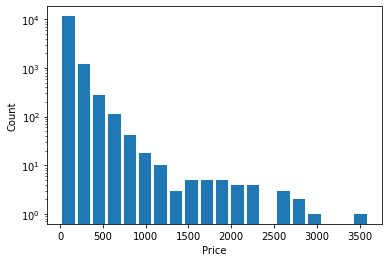

In [61]:
# Use log Scale
plt.hist(Data.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [62]:
#Detect the outliers
maxlimit=Data["price"].quantile(0.999)
maxlimit

2000.0

In [63]:
#Remove the outliers
Data[Data["price"]>maxlimit]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.0
10304,Plot Area,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.0
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
12443,Plot Area,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.0


In [64]:
# Detect the outliers
minlimit=Data["price"].quantile(0.0001)
minlimit

8.625864

In [65]:
# Remove the outliers
Data[Data["price"]<minlimit]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.44


In [66]:
Data_outliers=Data[(Data["price"]>minlimit)|(Data["price"]<maxlimit)]
Data_outliers.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [67]:
#Data with no outliers by using Percentile outliers removal
Data2=Data[(Data["price"]>minlimit)& (Data["price"]<maxlimit)]
Data2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [68]:
Data.shape[0] - Data2.shape[0]

17

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


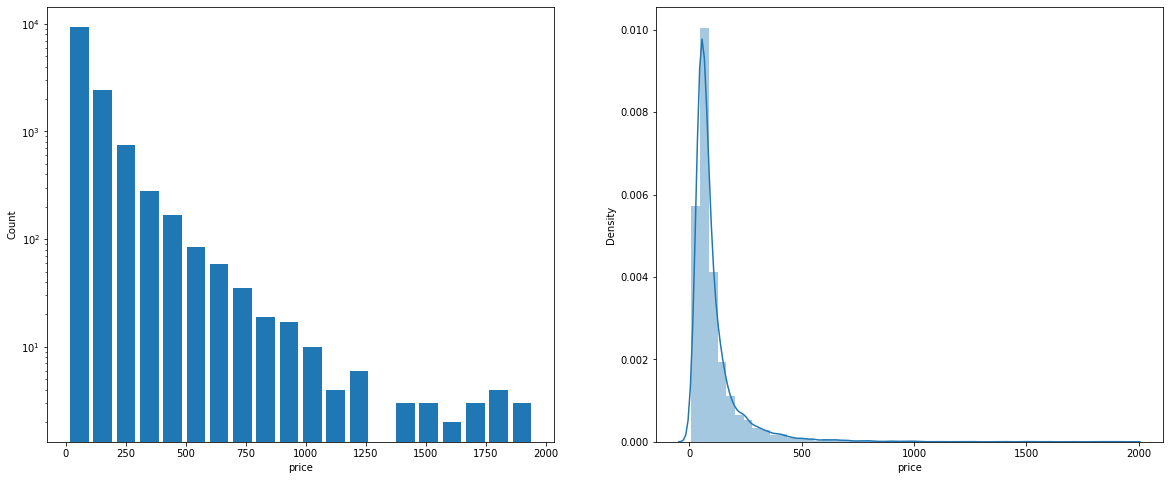

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.hist(Data2.price, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.yscale('log')
plt.show

plt.subplot(1,2,2)
sns.distplot(Data2.price)

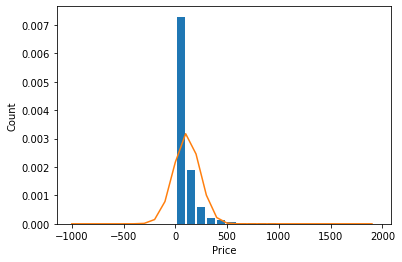

In [70]:
from scipy.stats import norm
import numpy as np
plt.hist(Data2.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(-1000, Data2.price.max(), 100)
plt.plot(rng, norm.pdf(rng,Data2.price.mean(),Data2.price.std()))

In [71]:
Data2.describe()

,bath,balcony,price
count,13231.000000,12700.000000,13303.000000
mean,2.689366,1.583701,109.920297
std,1.335975,0.817076,125.413583
min,1.000000,0.000000,9.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,1950.000000


In [72]:
Data2.price.mean()

109.92029654965032

In [73]:
Data2.price.std()

125.4135832056702

In [74]:
#Outlier detection and removal using 3 standard deviation
upper_limit = Data2.price.mean() + 4*Data2.price.std()
upper_limit

611.5746293723311

In [75]:
lower_limit =Data2.price.mean()-4*Data2.price.std()
lower_limit

-391.7340362730305

In [76]:
#the outliers that are beyond 4 std dev from mean
Data2[(Data2.price>upper_limit) | (Data2.price<lower_limit)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
641,Plot Area,Ready To Move,"6th block banashankari 3rd stage, 100 feet ORR",3 Bedroom,NaN,4000,3.0,1.0,660.0
743,Super built-up Area,Ready To Move,Cunningham Road,4 BHK,NaN,5270,4.0,3.0,1250.0
...,...,...,...,...,...,...,...,...,...
12896,Super built-up Area,Ready To Move,Infantry Road,5 BHK,NaN,4000,5.0,NaN,680.0
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,NaN,30400,4.0,2.0,1824.0
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0


In [77]:
#Outliers removal by using Standard Deviation Data without outliers
Data3=Data2[(Data2.price<upper_limit) & (Data2.price>lower_limit)]
Data3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [78]:
Data.shape

(13320, 9)

In [79]:
Data2.shape

(13303, 9)

In [80]:
Data3.shape

(13156, 9)

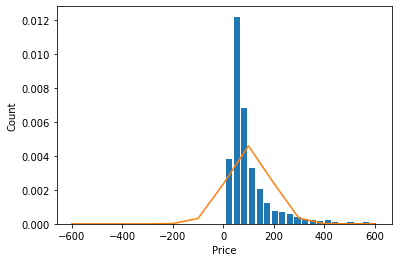

In [81]:
from scipy.stats import norm
import numpy as np
plt.hist(Data3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(-600, Data3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,Data3.price.mean(),Data3.price.std()))

In [82]:
#Outliers Detection and Removal by using Z score Z= Data-mean/standard deviation
Data2["zscore"]=(Data2.price-Data2.price.mean())/Data2.price.std()
Data2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.564933
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.080372
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.382098
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.118969
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.469808


In [83]:
#data points that has z score higher than 4 or lower than -4. Another way of saying same thing is get data points that are more than 4 standard deviation away

Data2[Data2["zscore"]>4]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0,4.306389
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0,5.183487
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0,4.705070
641,Plot Area,Ready To Move,"6th block banashankari 3rd stage, 100 feet ORR",3 Bedroom,NaN,4000,3.0,1.0,660.0,4.386125
743,Super built-up Area,Ready To Move,Cunningham Road,4 BHK,NaN,5270,4.0,3.0,1250.0,9.090560
...,...,...,...,...,...,...,...,...,...,...
12896,Super built-up Area,Ready To Move,Infantry Road,5 BHK,NaN,4000,5.0,NaN,680.0,4.545598
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,NaN,30400,4.0,2.0,1824.0,13.667417
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0,7.001472
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0,4.386125


In [84]:
Data2[Data2['zscore']<-4]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [85]:
# outliers
Data2[(Data2.zscore<-4)|(Data2.zscore>4)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0,4.306389
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0,5.183487
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0,4.705070
641,Plot Area,Ready To Move,"6th block banashankari 3rd stage, 100 feet ORR",3 Bedroom,NaN,4000,3.0,1.0,660.0,4.386125
743,Super built-up Area,Ready To Move,Cunningham Road,4 BHK,NaN,5270,4.0,3.0,1250.0,9.090560
...,...,...,...,...,...,...,...,...,...,...
12896,Super built-up Area,Ready To Move,Infantry Road,5 BHK,NaN,4000,5.0,NaN,680.0,4.545598
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,NaN,30400,4.0,2.0,1824.0,13.667417
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0,7.001472
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0,4.386125


In [86]:
# Remove the outliers from the Data points
Data4= Data2[(Data2.zscore>-4)&(Data2.zscore<4)]
Data4.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.564933
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.080372
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.382098
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.118969
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.469808


In [87]:
Data3.shape

(13156, 9)

In [88]:
Data4.shape

(13156, 10)

In [89]:
Data2.shape[0] - Data4.shape[0]

147

In [90]:
Data2.shape[0] - Data3.shape[0]

147

**Discover outliers with visualization tools**

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Box plot

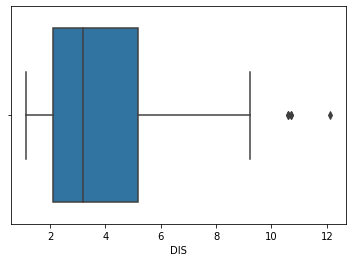

In [20]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

Scatter plot

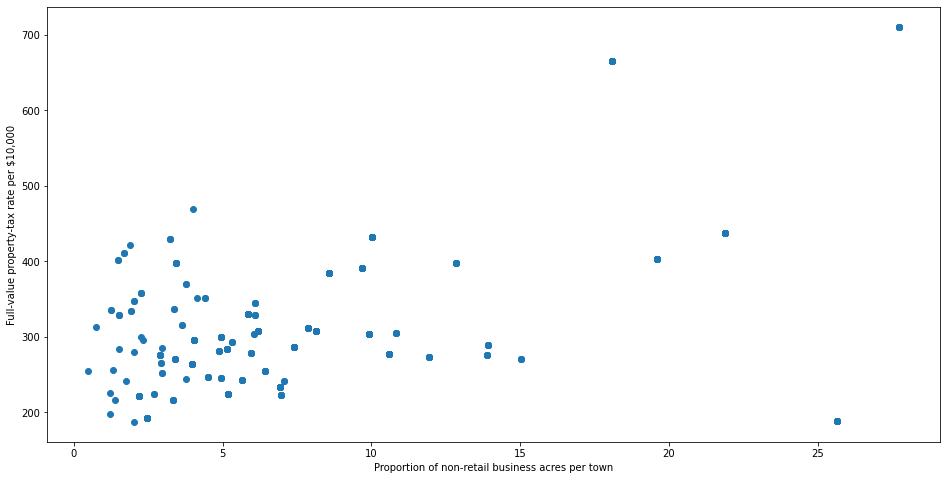

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

**Discover outliers with mathematical function**

 Z-score

In [22]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [23]:
#Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [24]:
#The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.
print(z[55][1])
#So, the data point — 55th record on column ZN is an outlier.

3.375038763517309


IQR score

In [25]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [26]:
#As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values.
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))
#we know how to detect the outliers, it is important to understand if they needs to be removed or corrected. 

      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
0    False  False  False  False  False  ...  False  False    False  False  False
1    False  False  False  False  False  ...  False  False    False  False  False
2    False  False  False  False  False  ...  False  False    False  False  False
3    False  False  False  False  False  ...  False  False    False  False  False
4    False  False  False  False  False  ...  False  False    False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...      ...    ...    ...
501  False  False  False  False  False  ...  False  False    False  False  False
502  False  False  False  False  False  ...  False  False    False  False  False
503  False  False  False  False  False  ...  False  False    False  False  False
504  False  False  False  False  False  ...  False  False    False  False  False
505  False  False  False  False  False  ...  False  False    False  False  False

[506 rows x 13 columns]


TypeError: ignored

**Working with Outliers: Correcting, Removing**

In [27]:
#Z Score
boston_df_o = boston_df[(z < 3).all(axis=1)]

In [28]:
boston_df.shape

(506, 13)

In [29]:
boston_df_o.shape
#So, above code removed around 90+ rows from the dataset i.e. outliers have been removed.

(415, 13)

In [30]:
#IQR Score
#Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.
boston_df_out = boston_df[~((boston_df< (Q1 - 1.5 * IQR)) |(boston_df> (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

How to deal with outliers in Python?

In [ ]:
1. Imports pandas and numpy libraries.
2. Creates your own dataframe using pandas.
3.Outliers handling by dropping them.
4. Outliers handling using boolean marking.
5. Outliers handling using Rescalinf of features.

In [32]:
# Loading library
import numpy as np
import pandas as pd

# Creating DataFrame
farm = pd.DataFrame()
farm['Price'] = [632541, 425618, 356471, 7412512]
farm['Rooms'] = [2, 5, 3, 100]
farm['Square_Feet'] = [1600, 2850, 1780, 90000]
print(); print(farm)

# Outlier Handling Option 1: Drop
# Droping observations greater than some value
#There are various ways to deal with outliers and one of them is to droping the outliers by appling some conditions on features.
#Here we have applied the condition on feature room that to select only the values which are less than 20.
h = farm[farm['Rooms'] < 20]
print(); print(h)

# Outlier Handling Option 2: Mark
# Creating feature based on boolean condition
#We can also mark the outliers and will not use that outliers in training the model. Here we are using bool to mark the outlier based on some condition.
farm['Outlier'] = np.where(farm['Rooms'] < 20, 0, 1)

# Show data
print(); print(farm)

# Outlier Handling Option 3: Rescale
# Log feature
#We can not use upper two methods when we have less data points in that case we can not afford to drop or mark the outliers. Here we can rescale the data so that the outliers can be used.
farm['Log_Of_Square_Feet'] = [np.log(x) for x in farm['Square_Feet']]

 # Show data
print(); print(farm)


     Price  Rooms  Square_Feet
0   632541      2         1600
1   425618      5         2850
2   356471      3         1780
3  7412512    100        90000

    Price  Rooms  Square_Feet
0  632541      2         1600
1  425618      5         2850
2  356471      3         1780

     Price  Rooms  Square_Feet  Outlier
0   632541      2         1600        0
1   425618      5         2850        0
2   356471      3         1780        0
3  7412512    100        90000        1

     Price  Rooms  Square_Feet  Outlier  Log_Of_Square_Feet
0   632541      2         1600        0            7.377759
1   425618      5         2850        0            7.955074
2   356471      3         1780        0            7.484369
3  7412512    100        90000        1           11.407565


**Handling Outliers**

**1.	Trimming**

In [ ]:
# import the needed packages
import pandas as pd
import numpy as np

# read your data
data = pd.read_csv("yourData.csv")

for variable in data.columns:
    #calculate the IQR
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    #calculate the boundries
    lower = data[variable].quantile(0.25) - (IQR * 1.5)
    upper = data[variable].quantile(0.75) + (IQR * 1.5)
    
    # find the outliers
    outliers = np.where(data[variable] > upper, True, np.where(data[variable] < lower, True, False))
    
    # remove outliers from data.
    data = data.loc[~(outliers, ]   

**2.Censoring**

In [ ]:
#Arbitrarily
#You can choose values to replace outliers arbitrarily; this can be based on the requirements of your use case.
# import the needed packages
import pandas as pd
import numpy as np

# read your data
data = pd.read_csv("yourData.csv")

for variable in data.columns:

    # create boundries (age for example)
    lower = 10
    upper = 89
    
    # replacing the outliers
    data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))

In [ ]:
#Inter-quantal range proximity rule
#the boundaries are determined using IQR proximity rules
# import the needed packages
import pandas as pd
import numpy as np

# read your data
data = pd.read_csv("yourData.csv")

for variable in data.columns:
    #calculate the IQR
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    #calculate the boundries
    lower = data[variable].quantile(0.25) - (IQR * 1.5)
    upper = data[variable].quantile(0.75) + (IQR * 1.5)
    
    # replacing the outliers
    data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))

In [ ]:
#Gaussian approximation
#sets the boundaries with values according to the mean and standard deviation
# import the needed packages
import pandas as pd
import numpy as np

# read your data
data = pd.read_csv("yourData.csv")

for variable in data.columns:
    
    #calculate the boundries
    lower = data[variable].mean() - 3 * data[variable].std()
    upper = data[variable].mean() + 3 * data[variable].std()
    
    # replacing the outliers
    data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))

In [ ]:
#Using quantiles
#the boundaries are determined using the quantiles, through which you can specify any percentage you want
# import the needed packages
import pandas as pd
import numpy as np

# read your data
data = pd.read_csv("yourData.csv")

for variable in data.columns:
    
    #calculate the boundries
    lower = data[variable].quantile(0.10)
    upper = data[variable].quantile(0.90)
    
    # replacing the outliers
    data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))

In [ ]:
#Winsorizing
import scipy.stats
import numpy as np
scipy.stats.mstats.winsorize(data['Height'],limits=0.05)

In [ ]:
#Standard Deviation based method
import numpy
mean=numpy.mean(data['Height'])
sd=numpy.std(data["Height"])
data[data['Height']>mean+3*sd]#outlier
data[data['Height']>mean-3*sd]#outlier

In [ ]:
#Histogram
#Histogram also displays these outliers clearly.
data.hist(column=['Height'])

In [ ]:
#Scatter Plot
#If there are more than one variable and scatter plot is also useful in detecting outliers visually.